# Notebook import and packages

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #colormap
from sympy import symbols,diff
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 : a simple cost function
$f(x)=x^2+x+1$

In [39]:
def f(x):
    return x**2+x+1

In [40]:
#make data
x_1=np.linspace(-3,3,500)    #start_stop_num

In [41]:
x_1

array([-3.        , -2.98797595, -2.9759519 , -2.96392786, -2.95190381,
       -2.93987976, -2.92785571, -2.91583166, -2.90380762, -2.89178357,
       -2.87975952, -2.86773547, -2.85571142, -2.84368737, -2.83166333,
       -2.81963928, -2.80761523, -2.79559118, -2.78356713, -2.77154309,
       -2.75951904, -2.74749499, -2.73547094, -2.72344689, -2.71142285,
       -2.6993988 , -2.68737475, -2.6753507 , -2.66332665, -2.65130261,
       -2.63927856, -2.62725451, -2.61523046, -2.60320641, -2.59118236,
       -2.57915832, -2.56713427, -2.55511022, -2.54308617, -2.53106212,
       -2.51903808, -2.50701403, -2.49498998, -2.48296593, -2.47094188,
       -2.45891784, -2.44689379, -2.43486974, -2.42284569, -2.41082164,
       -2.3987976 , -2.38677355, -2.3747495 , -2.36272545, -2.3507014 ,
       -2.33867735, -2.32665331, -2.31462926, -2.30260521, -2.29058116,
       -2.27855711, -2.26653307, -2.25450902, -2.24248497, -2.23046092,
       -2.21843687, -2.20641283, -2.19438878, -2.18236473, -2.17

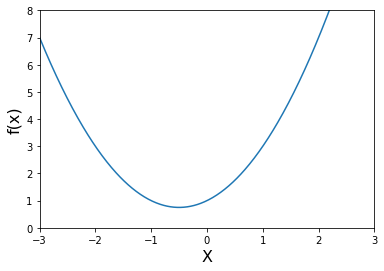

In [42]:
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1))
plt.show()

## Slope And Derivative
create a python function for derivative of f(x)

In [43]:
def df(x):
    return 2*x+1

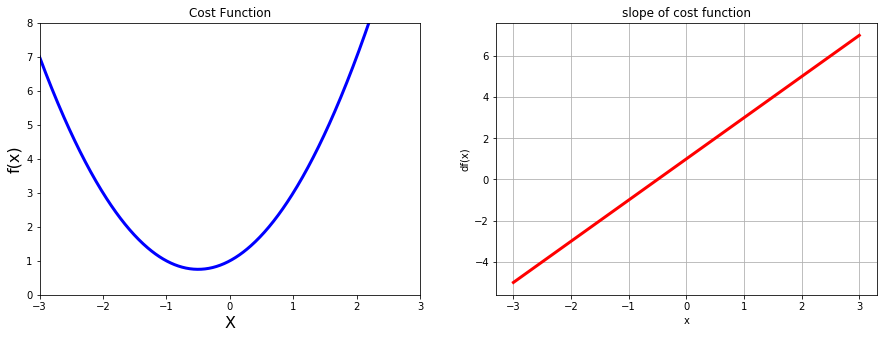

In [44]:
#plot function and derivative side by side
plt.figure(figsize=[15,5])
#chart 1 cost function
plt.subplot(1,2,1)
plt.title('Cost Function')
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1),color='blue',linewidth=3)
#chart 2 derivative
plt.subplot(1,2,2)
plt.title('slope of cost function')
plt.plot(x_1,df(x_1),color='red',linewidth=3)
plt.grid()
plt.xlabel('x')
plt.ylabel('df(x)')

plt.show()

## Python loops and Gradient descient

In [45]:
#gradient descent
new=3
previous=0
step_multiplier=0.1
precision=0.00001
x_list=[new]
slope_list=[df(new)]
for i in range(500):
    previous=new
    gradient=df(previous)
    new=previous-step_multiplier*gradient
    x_list.append(new)
    slope_list.append(df(new))
    stepsize=abs(new-previous)
    if (stepsize<precision):
        print('loop ran these many times',i)
        break
print('Local minimum exists at',new)
print('minimum slope value',df(new))
print('minimum value',f(new))


loop ran these many times 50
Local minimum exists at -0.49996003706460423
minimum slope value 7.992587079153068e-05
minimum value 0.7500000015970362


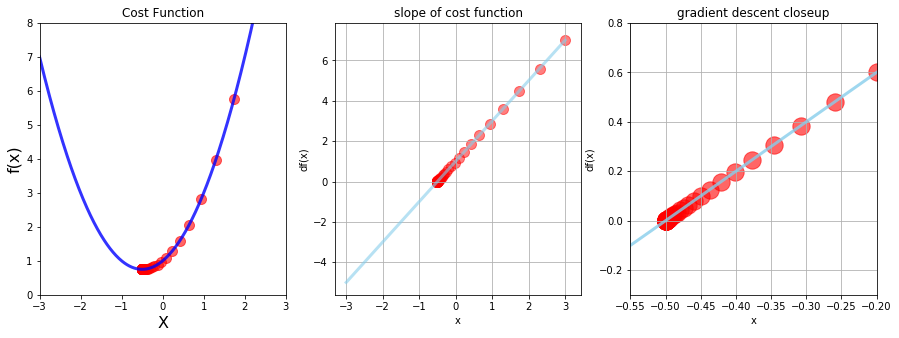

In [46]:
#superimpose gradient descent calculation
plt.figure(figsize=[15,5])
#chart 1 cost function
plt.subplot(1,3,1)
plt.title('Cost Function')
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1),color='blue',linewidth=3,alpha=0.8)

values=np.array(x_list)
plt.scatter(x_list,f(values),color='red',s=100,alpha=0.6)
#chart 2 derivative
plt.subplot(1,3,2)
plt.title('slope of cost function')
plt.plot(x_1,df(x_1),color='skyblue',linewidth=3,alpha=0.6)
plt.scatter(x_list,slope_list,color='red',s=100,alpha=0.5)
plt.grid()
plt.xlabel('x')
plt.ylabel('df(x)')

#chart 3 gradient descent closeup
plt.subplot(1,3,3)
plt.title('gradient descent closeup')
plt.plot(x_1,df(x_1),color='skyblue',linewidth=3,alpha=0.8)
plt.scatter(x_list,slope_list,color='red',s=300,alpha=0.6)
plt.grid()
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)
plt.xlabel('x')
plt.ylabel('df(x)')
plt.show()

In [47]:
#Make sample data for MSE with gradient
x_1=np.array([[0.1,1.2,2.4,3.2,4.1,5.7,6.5]]).transpose()
y_1=np.array([[1.7,2.4,3.5,3.0,6.1,9.4,8.2]]).reshape(7,1)
print('shape of x_1 array',x_1.shape)
print('shape of y_1array',y_1.shape)

shape of x_1 array (7, 1)
shape of y_1array (7, 1)


In [48]:
#Linear Regression
regre=LinearRegression()
regre.fit(x_1,y_1)
print('theta 0:',regre.intercept_[0])
print('theta 1:',regre.coef_[0][0])

theta 0: 0.8475351486029536
theta 1: 1.2227264637835915


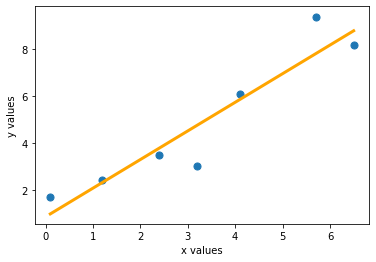

In [49]:
plt.scatter(x_1,y_1,s=50)
plt.plot(x_1,regre.predict(x_1),color='orange',linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [50]:
#y^=theta0+ theta1x   to find observed y using linear regression
y_hat= 0.8475351486029536 + 1.2227264637835915*x_1
print('estimated value',y_hat)
print('actual values are \n',y_1)

estimated value [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
actual values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [51]:
def mse(y,y_hat):
    mse_calc=(1/y.size) *sum((y-y_hat)**2)
    return mse_calc

In [52]:
print('manually calculated mse is',mse(y_1,y_hat))
print('MSE regression using manual cal is',mean_squared_error(y_1,y_hat))
print('MSE regression is',mean_squared_error(y_1,regre.predict(x_1)))

manually calculated mse is [0.94796558]
MSE regression using manual cal is 0.9479655759794577
MSE regression is 0.9479655759794577


## 3D plot for MSE Cost function
### data for thetas

In [62]:
num_thetas=5
th_0=np.linspace(-1,3,num_thetas)
th_1=np.linspace(-1,3,num_thetas)
plot_t0,plot_t1=np.meshgrid(th_0,th_1)


## calculating MSE 

In [64]:
plot_cost=np.zeros((num_thetas,num_thetas))
for i in range(num_thetas):
    for j in range(num_thetas):
        y_hat=plot_t0[i][j]+ plot_t1[i][j]*x_1          #predicted values
        plot_cost[i][j]=mse(y_1,y_hat)
print('shape of plot_t0',plot_t0.shape)
print('shape of plot_t1',plot_t1.shape)
print('shape of plot_cost',plot_cost.shape)
        

shape of plot_t0 (5, 5)
shape of plot_t1 (5, 5)
shape of plot_cost (5, 5)


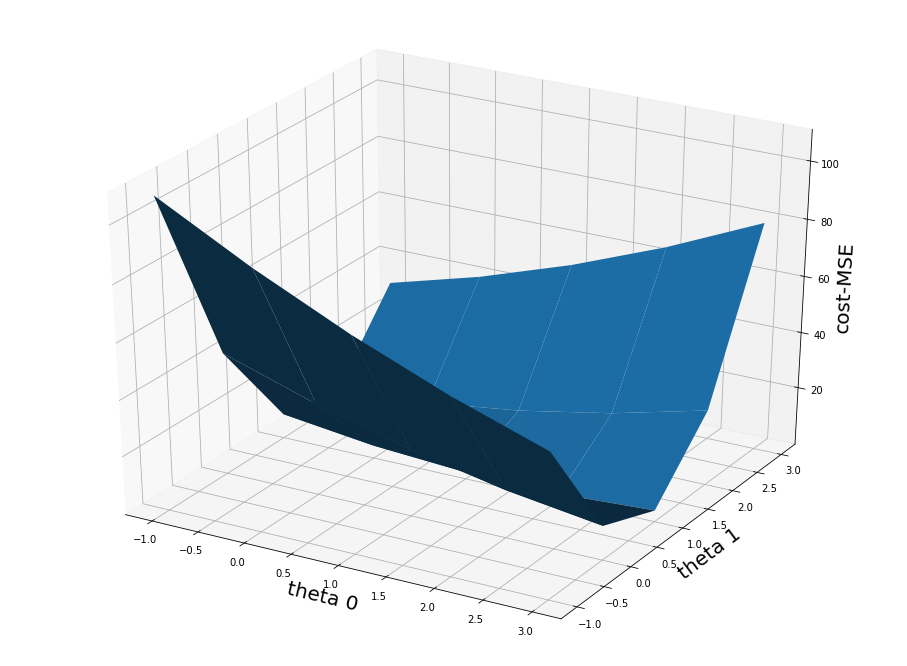

In [69]:
#plotting mse
fig=plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')
ax.set_xlabel('theta 0',fontsize=20)
ax.set_ylabel('theta 1',fontsize=20)
ax.set_zlabel('cost-MSE',fontsize=20)
ax.plot_surface(plot_t0,plot_t1,plot_cost)
plt.show()

In [75]:
print('Min value of plot_cost',plot_cost.min())
ij_min=np.unravel_index(indices=plot_cost.argmin(),shape=plot_cost.shape)
print('min ocurs at',ij_min)
print('MSE at min position for theta 0 is',plot_t0[2][3])
print(plot_t1[2][3])

Min value of plot_cost 1.3471428571428576
min ocurs at (2, 3)
MSE at min position for theta 0 is 2.0
1.0


## partial derivative of MSE w.r.t $\theta_0$ and $\theta_1$
## $$\frac{\partial MSE}{\partial \theta_0} =-\frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)}-\theta_0-\theta_1 x^{i}\big)$$
## $$\frac{\partial MSE}{\partial \theta_1} =-\frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)}-\theta_0-\theta_1 x^{i}\big)\big(x^{(i)}\big)$$

## MSE & Gradient Descent

In [54]:
#thetas is array of thetas parameters(theta_0 at index 0 and theta_1 at index 1), x values, y values
def grad(x,y,thetas):
    n=y.size           #no of y values
    theta0_slope=(-2/n)*sum(y-thetas[0]-thetas[1]*x)
    theta1_slope=(-2/n)*sum((y-thetas[0]-thetas[1]*x)*x)
    return np.array([theta0_slope[0],theta1_slope[0]])
    # return np.append(arr=theta0_slope,values=theta1_slope)
    # return np.concatenate((theta0_slope,theta1_slope),axis=0)
    
    

In [77]:
multiplier=0.01
thetas=np.array([2.9,2.9])   #initial guesses
#data points for scatter plot
plot_vals=thetas.reshape(1,2)
mse_vals=mse(y_1,thetas[0]+thetas[1]*x_1)

for i in range(1000):
    thetas=thetas-multiplier*grad(x_1,y_1,thetas)
    
    #append new values to numpy array
    plot_vals=np.concatenate((plot_vals,thetas.reshape(1,2)),axis=0)
    mse_vals=np.append(arr=mse_vals,values=mse(y_1,thetas[0]+thetas[1]*x_1))
print('Min occurs at theta 0',thetas[0])
print('Min occurs at theta 1',thetas[1])
print('MSE is',mse(y_1,thetas[0]+thetas[1]*x_1))

Min occurs at theta 0 0.8532230461743415
Min occurs at theta 1 1.2214935332607393
MSE is [0.94797511]


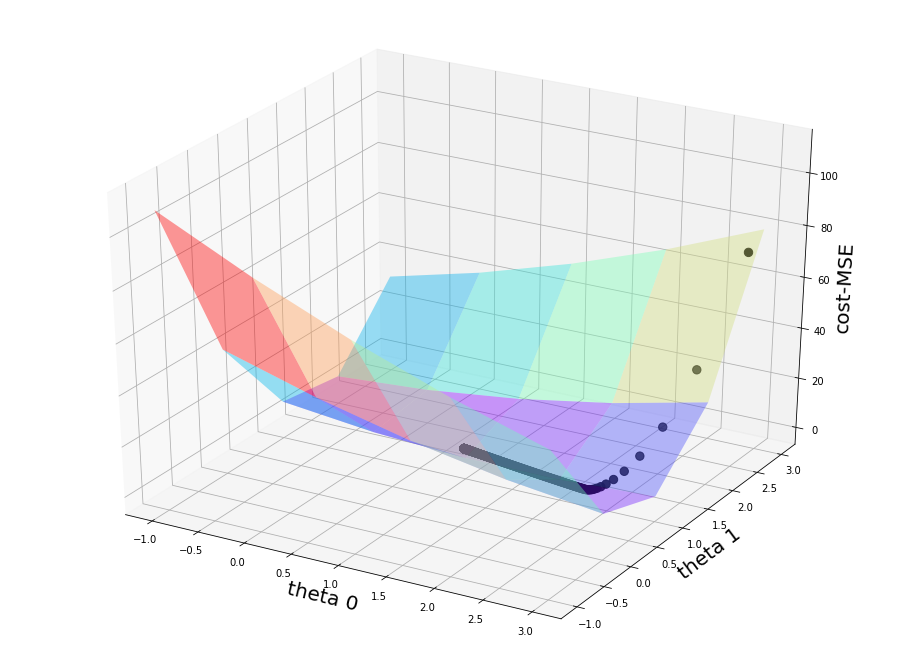

In [80]:
#plotting mse
fig=plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')
ax.set_xlabel('theta 0',fontsize=20)
ax.set_ylabel('theta 1',fontsize=20)
ax.set_zlabel('cost-MSE',fontsize=20)
ax.scatter(plot_vals[:,0],plot_vals[:,1],mse_vals,s=70,color='black')#all rows/values at given column index
ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.rainbow,alpha=0.4)
plt.show()